# Data visualization

Here I want to visualize the 3D distribution of the data looking at 3 features at a time.

In [1]:
# LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

# %matplotlib widget
%matplotlib inline

In [2]:
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [3]:
df = df.drop_duplicates(ignore_index=True)
df.rename(columns = {'AspectRation':'AspectRatio'}, inplace = True)
df.rename(columns = {'roundness':'Roundness'}, inplace = True)
df.rename(columns = {'EquivDiameter':'EquivalentDiameter'}, inplace = True)

df = df.astype({'Area': 'float64'})
df = df.astype({'ConvexArea': 'float64'})
df = df.astype({'Class': 'string'})

In [6]:
# Drop class BOMBAY

# df = df[(df["Class"] != 'BOMBAY')];

In [7]:
# Plot correlation

# fig, ax = plt.subplots(figsize=(10,8))
# sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax);
# fig.tight_layout()

## Functions

In [12]:
def feature_analysis2D(df, features):
    
    sub_df = df[features]
    temp_df = pd.concat([sub_df, df[['Class']]], axis = 1)

    fig, ax = plt.subplots(figsize=(6,6))
    corr = sns.heatmap(temp_df.corr(numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);

    # DATA VISUALIZATION in 2D

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(features[0], fontsize = 15)
    ax.set_ylabel(features[1], fontsize = 15)
    ax.set_title('2 features analysis', fontsize = 20)

    labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for label, color in zip(labels,colors):
        indicesToKeep = temp_df['Class'] == label
        ax.scatter(temp_df.loc[indicesToKeep, features[0]]
                , temp_df.loc[indicesToKeep, features[1]]
                , c = color
                , s = 10)

    ax.legend(labels)
    ax.grid()
    

In [11]:
def feature_analysis3D(df, features, loc=0):
    
    sub_df = df[features]
    temp_df = pd.concat([sub_df, df[['Class']]], axis = 1)

    fig, ax = plt.subplots(figsize=(6,6))
    corr = sns.heatmap(temp_df.corr(numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);

    # DATA VISUALIZATION in 3D
        
    fig = plt.figure(dpi=120, figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d') 
    ax.set_xlabel(features[0], fontsize = 15)
    ax.set_ylabel(features[1], fontsize = 15)
    ax.set_zlabel(features[2], fontsize = 15)
    # ax.set_tick(fontsize=5)
    ax.set_title('3 features analysis', fontsize = 15)

    labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for label, color in zip(labels,colors):
        indicesToKeep = temp_df['Class'] == label
        ax.scatter(temp_df.loc[indicesToKeep, features[0]]
                , temp_df.loc[indicesToKeep, features[1]]
                , temp_df.loc[indicesToKeep, features[2]]
                , c = color
                , s = 5)

    ax.legend(labels, fontsize = 10, loc=loc)
    ax.grid()

## 3D Feature Analysis

In [8]:
# Activate the intervative environment

# %matplotlib widget

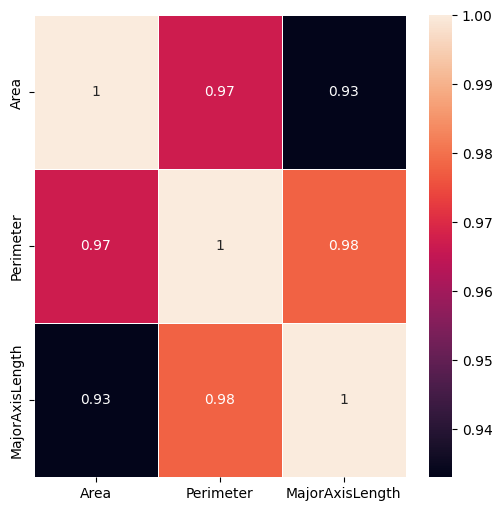

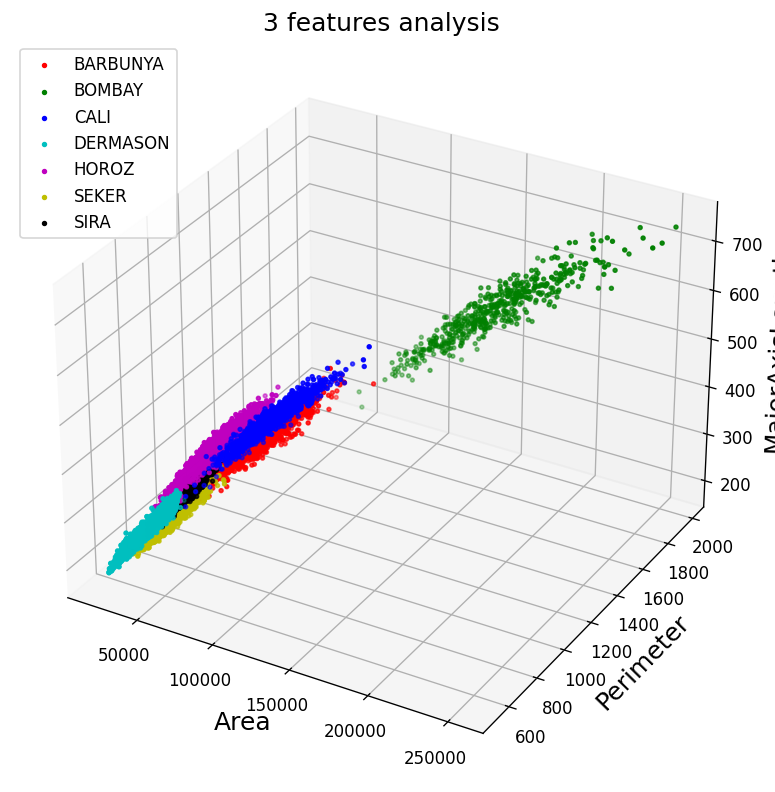

In [13]:
# Choose 3 attributes to look at

features = ["Area", "Perimeter", "MajorAxisLength"]
feature_analysis3D(df, features)

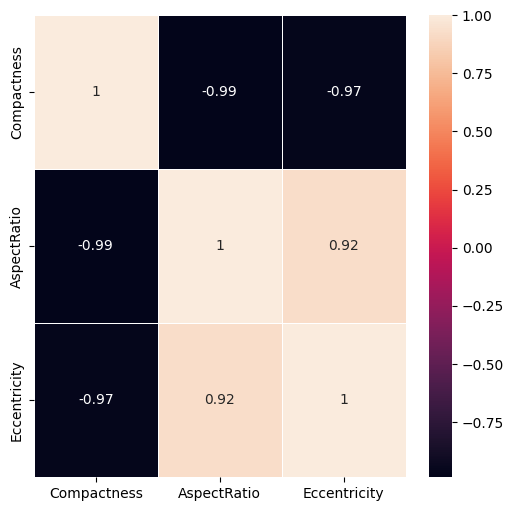

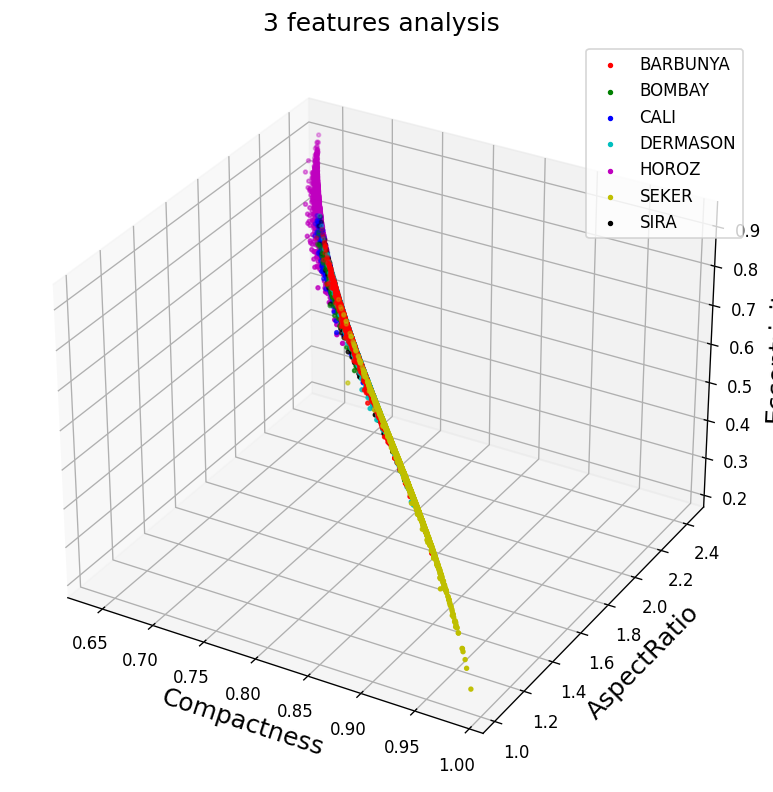

In [14]:
# Choose 3 attributes to look at

features = ["Compactness", "AspectRatio", "Eccentricity"]
feature_analysis3D(df, features)

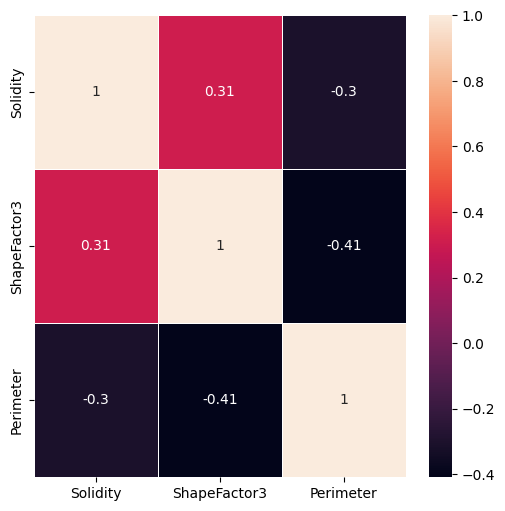

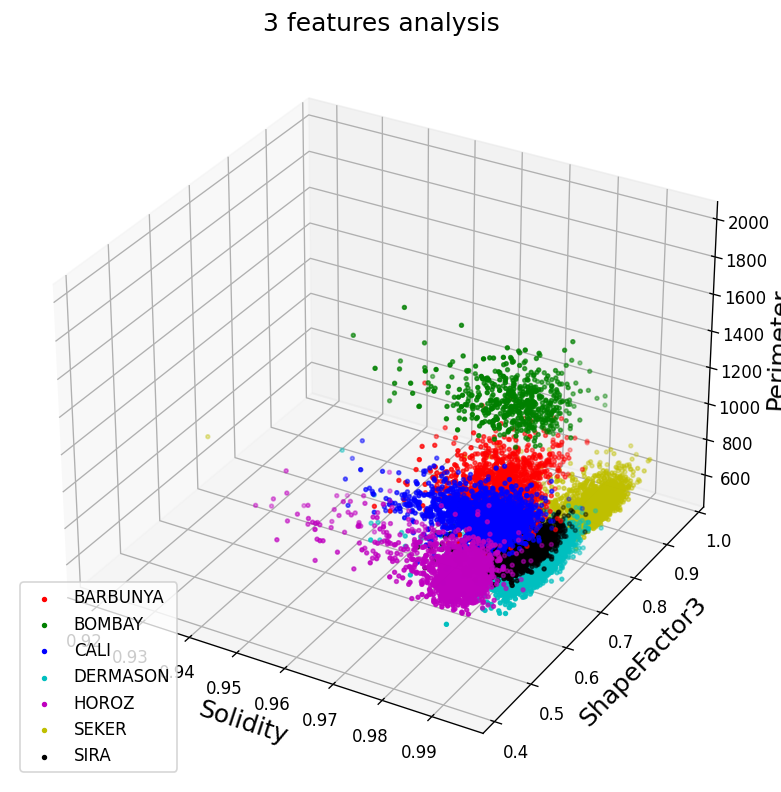

In [15]:
# Choose 3 attributes to look at

features = ["Solidity", "ShapeFactor3", "Perimeter"]
feature_analysis3D(df, features, loc=3)

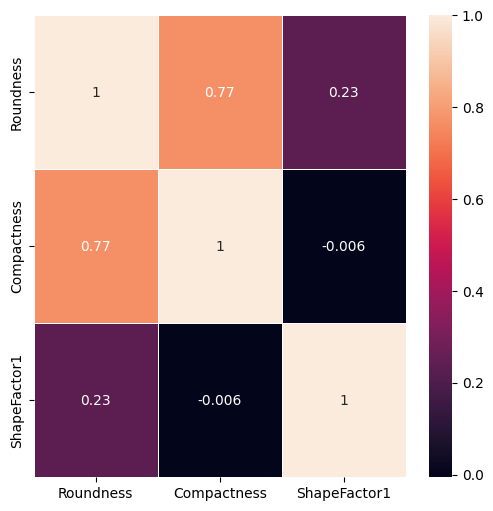

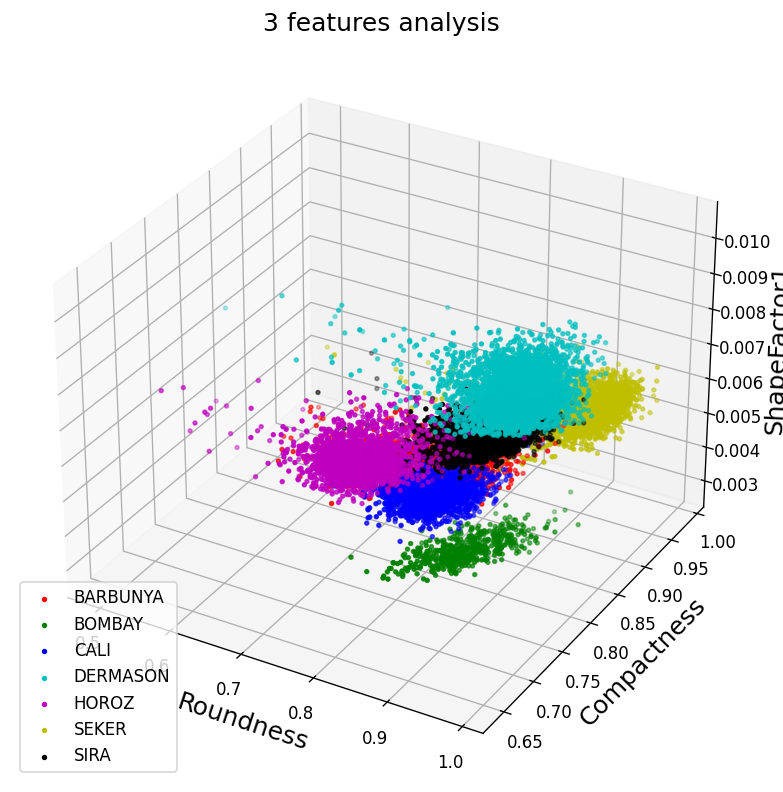

In [17]:
# %matplotlib widget

# Choose 3 attributes to look at

features = ["Roundness", "Compactness", "ShapeFactor1"]
feature_analysis3D(df, features, loc=3)

# 2D Feature Analysis

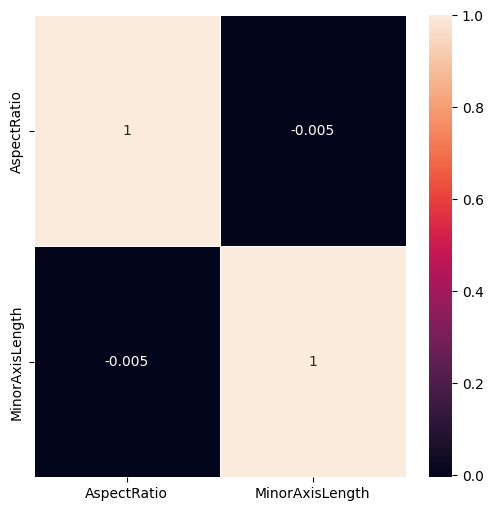

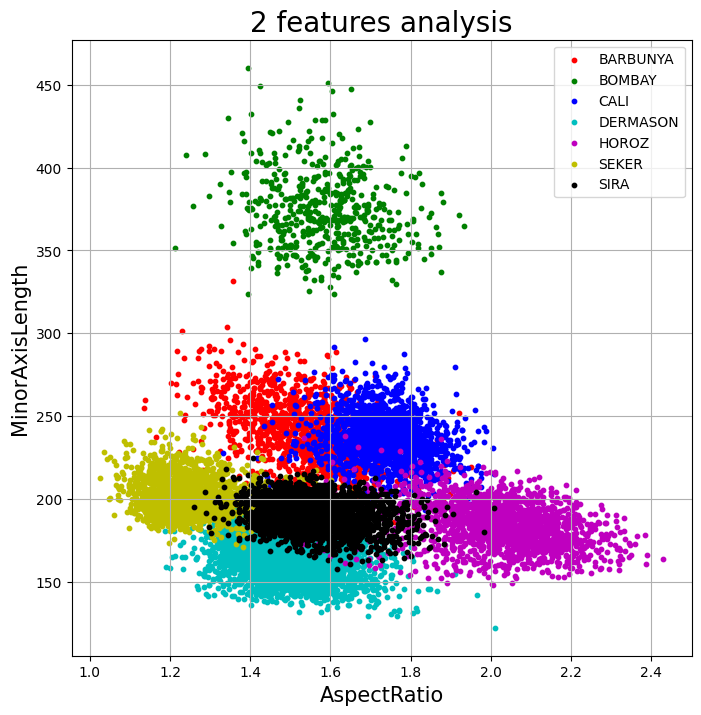

In [19]:
%matplotlib inline

# Choose 2 attributes to look at

features = ["AspectRatio", "MinorAxisLength"]
feature_analysis2D(df, features)

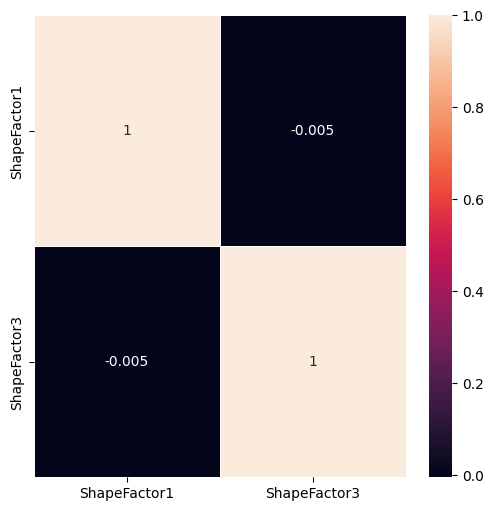

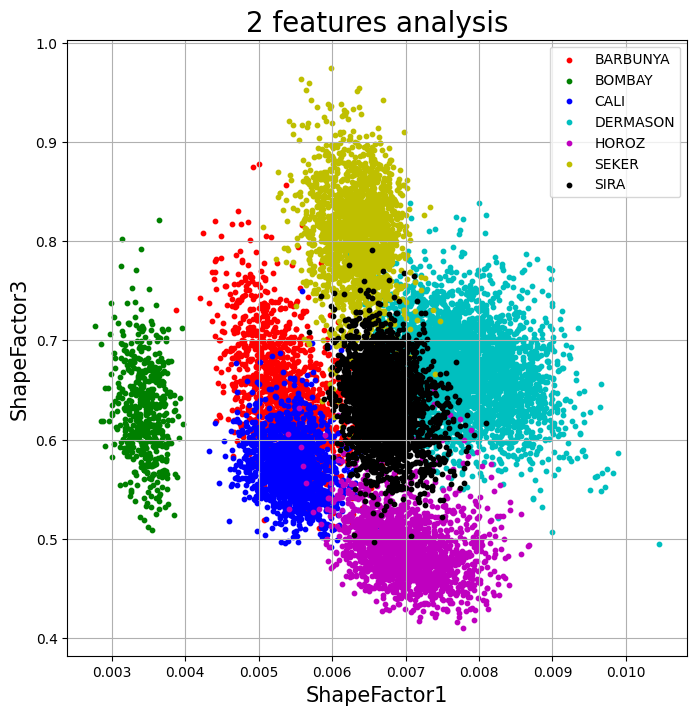

In [20]:
# Choose 2 attributes to look at

features = ["ShapeFactor1", "ShapeFactor3"]
feature_analysis2D(df, features)

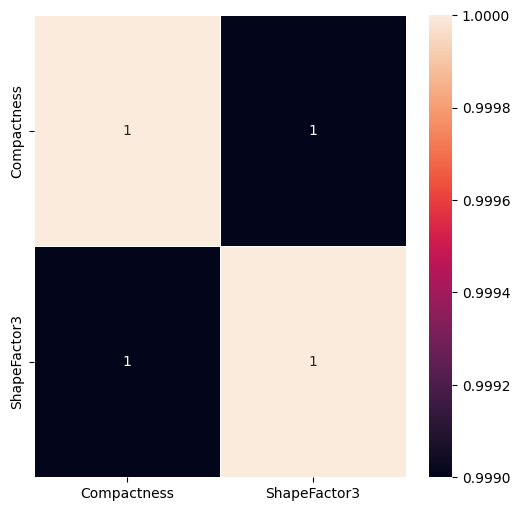

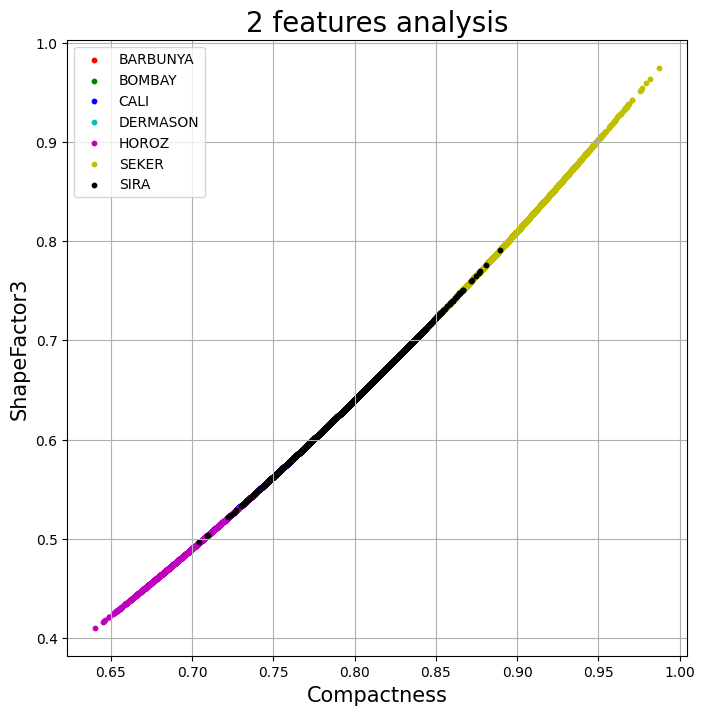

In [21]:
# Choose 2 attributes to look at

features = ["Compactness", "ShapeFactor3"]
feature_analysis2D(df, features)

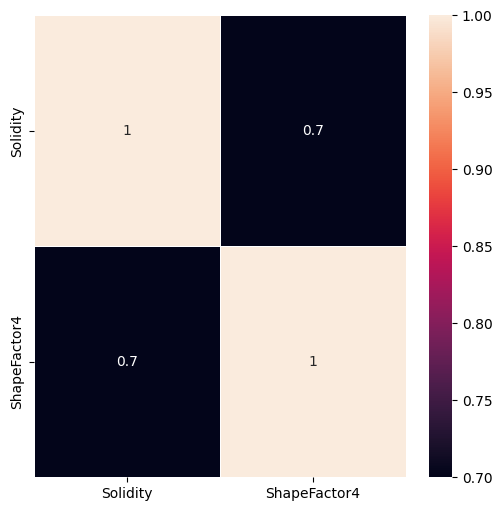

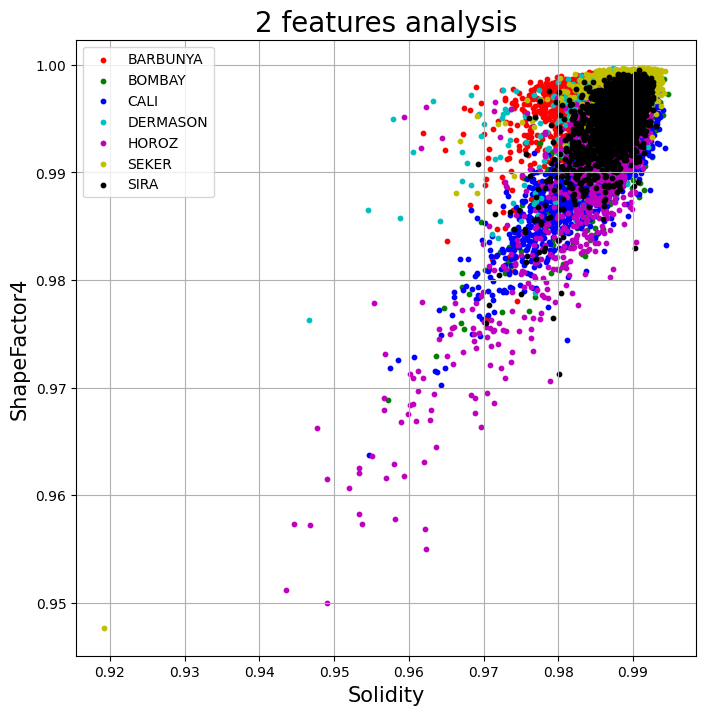

In [22]:
# Choose 2 attributes to look at

features = ["Solidity", "ShapeFactor4"]
feature_analysis2D(df, features)